<a href="https://colab.research.google.com/github/samthakur587/Major-project-/blob/main/USA_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/USA_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,32,2020-01-22 00:00:00,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0
1,72,2020-01-23 00:00:00,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0
2,122,2020-01-24 00:00:00,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0
3,123,2020-01-24 00:00:00,Chicago,US,2020-01-24 17:00:00,1.0,0.0,0.0
4,165,2020-01-25 00:00:00,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0


In [2]:
df.shape

(26740, 8)

In [3]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [15]:
df.drop('SNo',axis=1,inplace=True)
df = df.rename(columns= { 'Province/State':'state','Country/Region':'country'})

In [16]:
df.isnull().sum()

ObservationDate    0
state              0
country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26740 entries, 0 to 26739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  26740 non-null  datetime64[ns]
 1   state            26740 non-null  object        
 2   country          26740 non-null  object        
 3   Last Update      26740 non-null  object        
 4   Confirmed        26740 non-null  float64       
 5   Deaths           26740 non-null  float64       
 6   Recovered        26740 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.4+ MB


In [18]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26740 entries, 0 to 26739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  26740 non-null  datetime64[ns]
 1   state            26740 non-null  object        
 2   country          26740 non-null  object        
 3   Last Update      26740 non-null  object        
 4   Confirmed        26740 non-null  float64       
 5   Deaths           26740 non-null  float64       
 6   Recovered        26740 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.4+ MB


##=> ***NOW WE ARE PLOTING THE GRAPH OF DATA USING MATPLOTLIB***


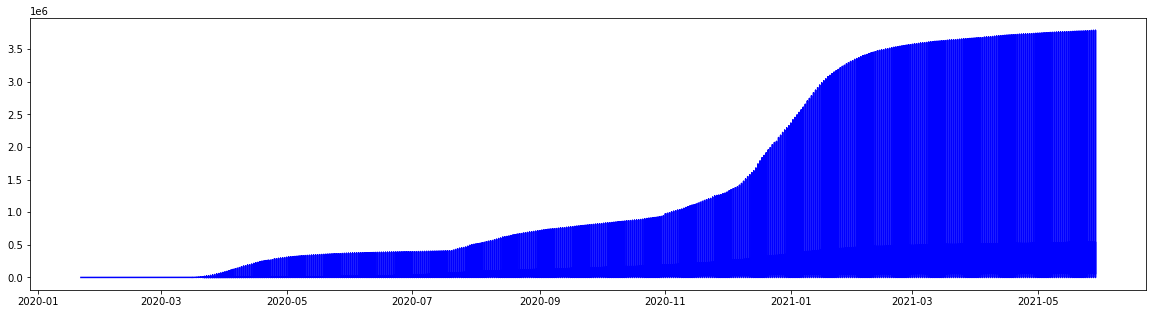

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Confirmed'] , color= 'b')


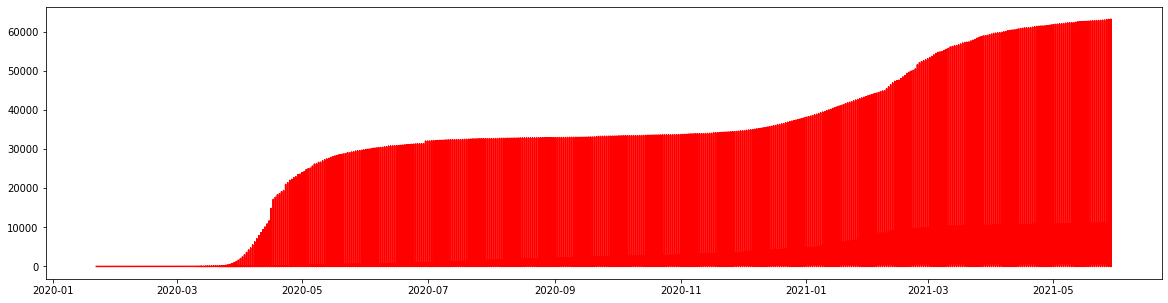

In [21]:
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Deaths'] , color='r')

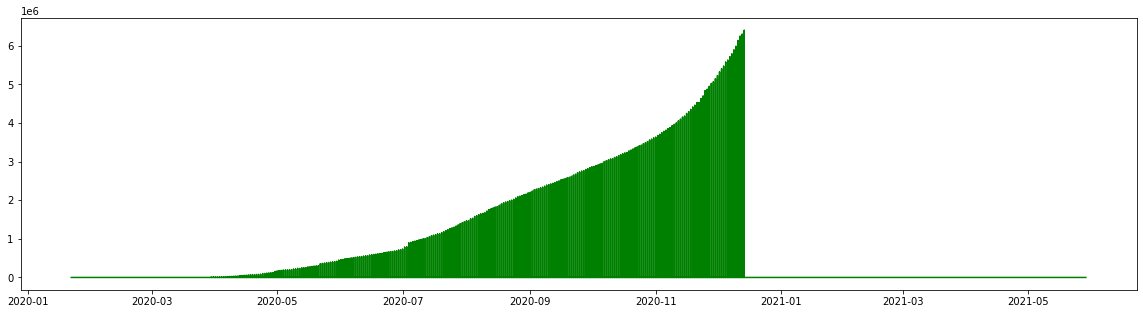

In [22]:
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Recovered'] , color='g')

##=> ***NOW WE ARE DOING THE FORCASTING FOR CONFIRMED CASES***


In [23]:
df1 = df.iloc[:,[0,4]]
df1

,ObservationDate,Confirmed
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,1.0
3,2020-01-24,1.0
4,2020-01-25,1.0
...,...,...
26735,2021-05-29,675165.0
26736,2021-05-29,435849.0
26737,2021-05-29,161287.0
26738,2021-05-29,674003.0


In [24]:
df1 = df1.rename(columns ={'Confirmed':'y','ObservationDate':'ds'})

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


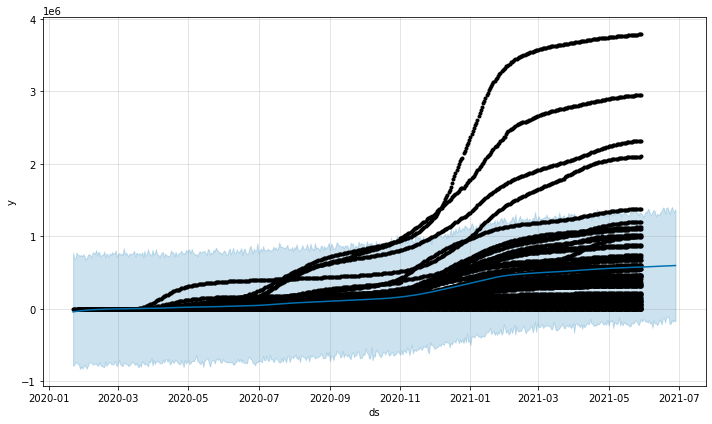

In [25]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95 ,daily_seasonality=True,yearly_seasonality=True)
model.fit(df1)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot1 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


In [ ]:
plot2 = model.plot_components(prediction)


=> ***now we are doing cross valition of our data to find out how much error are occers in our forcating data***

In [27]:
#cross validation 
#we have a data from 2020-01 to 2021-06
#2020-01 to 2020-09 - training part
#2020-09 to 2021-06 - testing part
#future data is 30 day our - validation

In [28]:
df1['ds'].nunique()

494

In [29]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='200 days' ,period='15 days' ,horizon='30 days')
df_cv.head()
df_cv.shape

INFO:fbprophet:Making 18 forecasts with cutoffs between 2020-08-17 00:00:00 and 2021-04-29 00:00:00


(31320, 6)

In [31]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,3 days,2.168474e+11,465668.719804,267971.947809,0.743287,0.865581
1,4 days,2.186665e+11,467617.857773,269561.468739,0.742059,0.860153
2,5 days,2.204908e+11,469564.461795,271198.470369,0.742429,0.852171
3,6 days,2.222729e+11,471458.279870,272860.941260,0.741691,0.850894
4,7 days,2.240956e+11,473387.349332,274612.098865,0.741803,0.845466


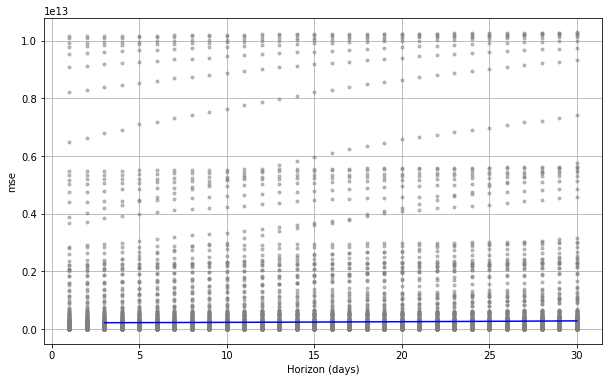

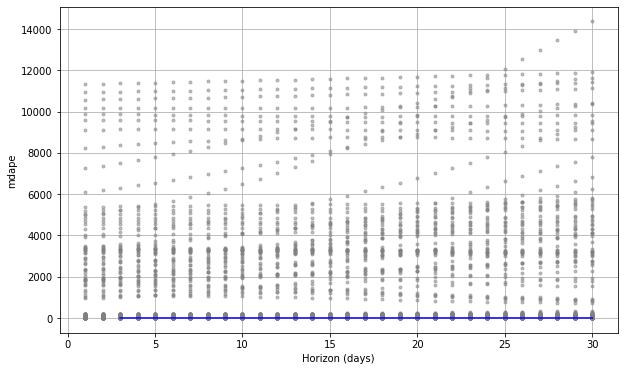

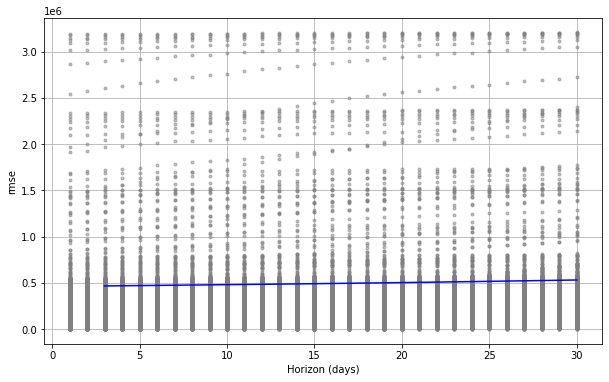

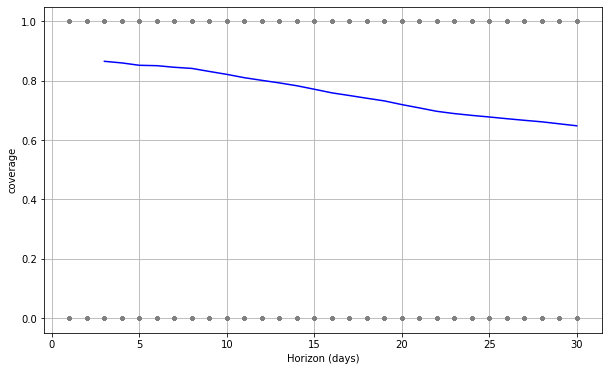

In [32]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv ,metric='mse')
fig = plot_cross_validation_metric(df_cv ,metric='mdape')
fig = plot_cross_validation_metric(df_cv ,metric='rmse')
fig = plot_cross_validation_metric(df_cv ,metric='coverage')


***=>•Which country/state is having highest number of cases?***

***run*** this shell : 

In [33]:
import numpy as np
array = np.unique(df['state'])
df['state'].value_counts()
list1 = []
list2 = []
for i in range(0,37):
  df_count = df[df['state'] == array[i]]
  sum = df_count['Confirmed'].sum()
  list1.append(sum)
  list2.append(array[i])
data_cnf = pd.DataFrame(list(zip(list2,list1)), columns=['state','confirmedcases'])
data_cnf.head()
data_cnf.to_csv('confiremed_cases.csv',index=False)
print("THE HIGHEST CONFIREMED_CASES ARE : {0} ".format(np.max(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.max(data_cnf['confirmedcases']) ]


THE HIGHEST CONFIREMED_CASES ARE : 696898013.0 


,state,confirmedcases
14,California,696898013.0


**=> •Which country/state is having lowest number of cases?**

***run this shell : ***

In [34]:
print("THE LOWEST CONFIREMED_CASES ARE : {0} ".format(np.min(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.min(data_cnf['confirmedcases']) ]

THE LOWEST CONFIREMED_CASES ARE : 0.0 


,state,confirmedcases
4,American Samoa,0.0


# **NOW WE ARE FORCASTING FOR TOTAL DEATHS** 

In [35]:
df2 = df.iloc[:,[0,5]]
df2

,ObservationDate,Deaths
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-24,0.0
4,2020-01-25,0.0
...,...,...
26735,2021-05-29,11160.0
26736,2021-05-29,5765.0
26737,2021-05-29,2792.0
26738,2021-05-29,7830.0


In [36]:
df2 = df2.rename(columns ={'Deaths':'y','ObservationDate':'ds'})

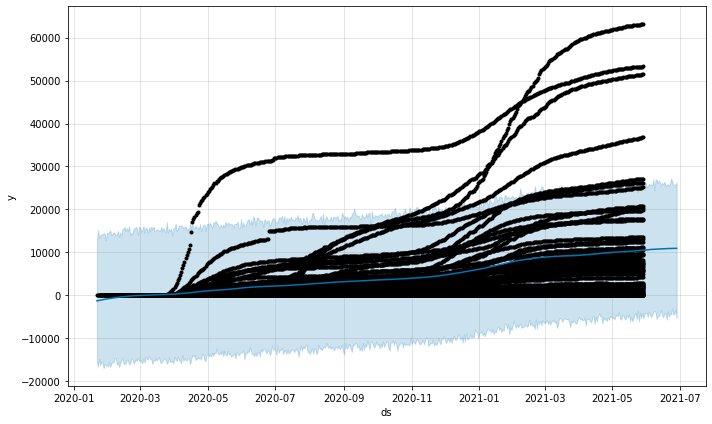

In [37]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True,yearly_seasonality=True)
model.fit(df2)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot3 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


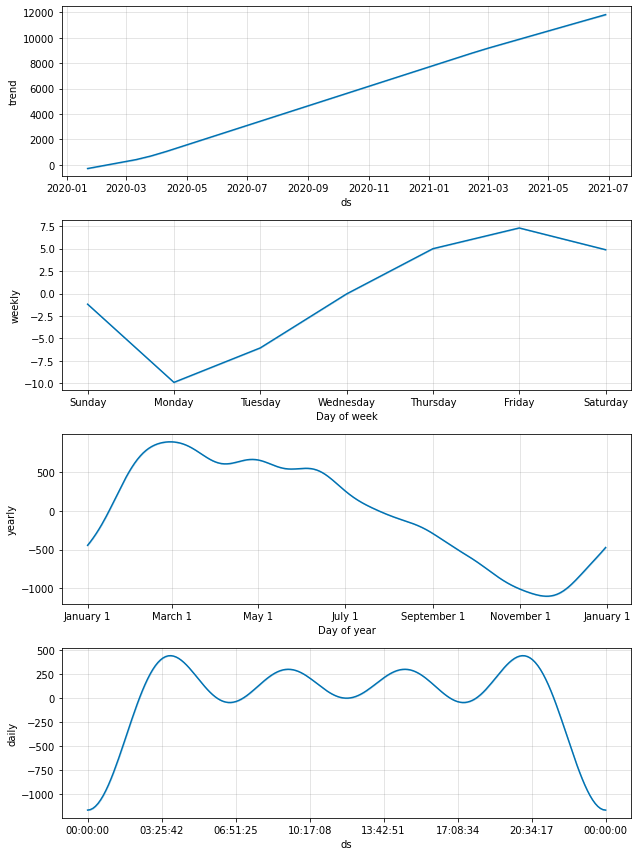

In [38]:
plot4 = model.plot_components(prediction)

**=>•Which country/state is having highest number of deaths?**

In [39]:
import numpy as np
array = np.unique(df['state'])
df['state'].value_counts()
list3 = []
list4 = []
for i in range(0,37):
  df_death = df[df['state'] == array[i]]
  sum = df_death['Deaths'].sum()
  list3.append(sum)
  list4.append(array[i])
data_ded = pd.DataFrame(list(zip(list4,list3)), columns=['state','Deaths'])
data_ded.head()
data_ded.to_csv('total_deaths.csv',index=False)
print("THE HIGHEST Deaths  ARE : {0} ".format(np.max(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.max(data_ded['Deaths']) ]


THE HIGHEST Deaths  ARE : 10831870.0 


,state,Deaths
14,California,10831870.0


**=>•Which country/state is having lowest number of deaths?**

In [40]:
print("THE LOWEST DEATHS ARE : {0} ".format(np.min(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.min(data_ded['Deaths']) ]

THE LOWEST DEATHS ARE : 0.0 


,state,Deaths
0,"Norfolk County, MA",0.0
2,"Alameda County, CA",0.0
4,American Samoa,0.0
7,"Ashland, NE",0.0
8,"Bennington County, VT",0.0
9,"Bergen County, NJ",0.0
10,"Berkeley, CA",0.0
11,"Berkshire County, MA",0.0
12,"Boston, MA",0.0
13,"Broward County, FL",0.0


# ***here we are forcating the recoverd cases***

In [41]:
df3 = df.iloc[:,[0,6]]
df3

,ObservationDate,Recovered
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-24,0.0
4,2020-01-25,0.0
...,...,...
26735,2021-05-29,0.0
26736,2021-05-29,0.0
26737,2021-05-29,0.0
26738,2021-05-29,0.0


In [42]:
df3 = df3.rename(columns ={'Recovered':'y','ObservationDate':'ds'})

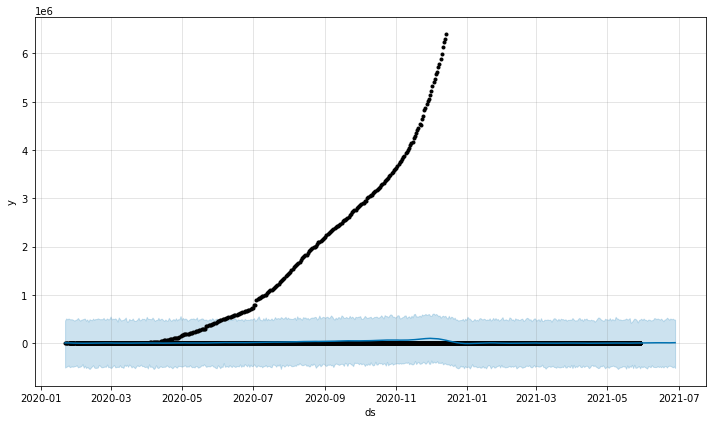

In [43]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True , yearly_seasonality=True)
model.fit(df3)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot6 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


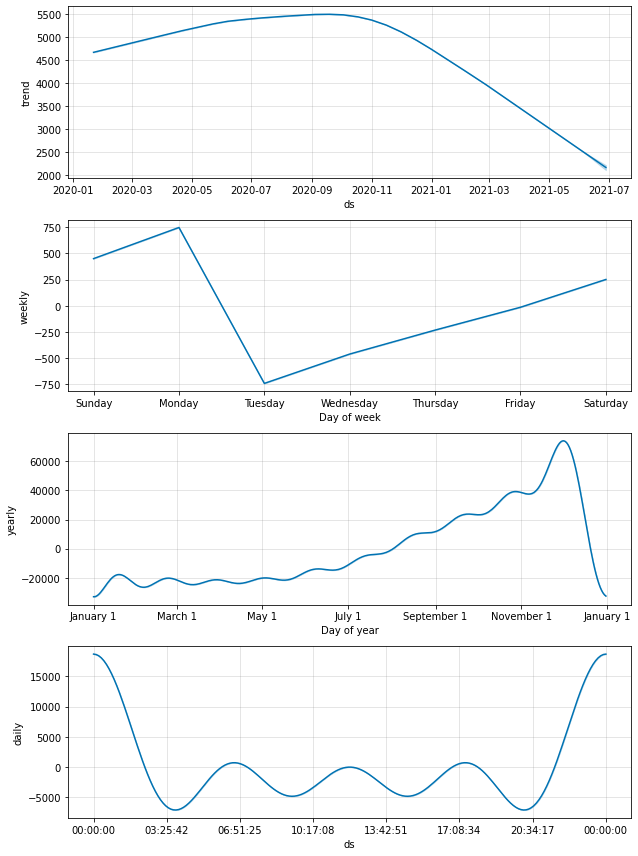

In [44]:
plot5 = model.plot_components(prediction)

***=> which country/state is having highest people recoverd ***

In [45]:
import numpy as np
array = np.unique(df['state'])
df['state'].value_counts()
list5 = []
list6 = []
for i in range(0,37):
  df_recov = df[df['state'] == array[i]]
  sum = df_recov['Recovered'].sum()
  list5.append(sum)
  list6.append(array[i])
data_rec = pd.DataFrame(list(zip(list6,list5)), columns=['state','recover'])
data_rec.head()
data_rec.to_csv('total_recover.csv',index=False)
print("THE HIGHEST RECOVERD  ARE : {0} ".format(np.max(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.max(data_rec['recover']) ]


THE HIGHEST RECOVERD  ARE : 44.0 


,state,recover
21,"Chicago, IL",44.0


***=> which country/state is having lowest people recoverd ***

In [46]:
print("THE LOWEST recover ARE : {0} ".format(np.min(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.min(data_rec['recover'])]

THE LOWEST recover ARE : 0.0 


,state,recover
0,"Norfolk County, MA",0.0
1,Alabama,0.0
2,"Alameda County, CA",0.0
3,Alaska,0.0
4,American Samoa,0.0
6,Arkansas,0.0
7,"Ashland, NE",0.0
8,"Bennington County, VT",0.0
9,"Bergen County, NJ",0.0
10,"Berkeley, CA",0.0
